In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_colwidth', -1)
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("titanic_datasets/train.csv")
train_data = df.copy()
test_data = pd.read_csv("titanic_datasets/test.csv")
train_features = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age','SibSp', 'Parch', 'Ticket', 'Fare',	'Cabin', 'Embarked']
test_feature = ['Survived']
print(len(train_data))
print(len(test_data))

891
418


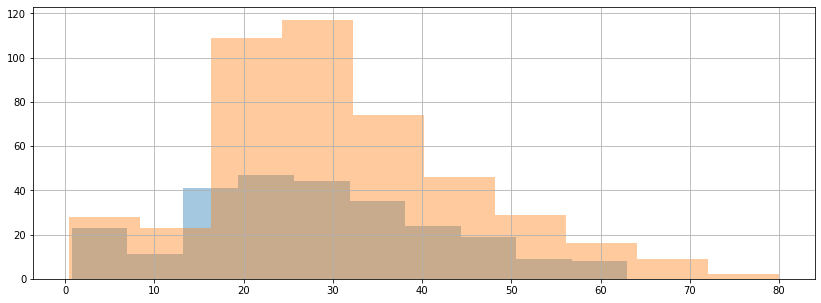

In [133]:
plt.subplots(figsize=(14,5))
h = train_data.groupby('Sex').Age.hist(alpha=0.4)

### Explore PClass

In [6]:
# 1. See in each class, how many survived  - Histogram?
## 1.1 See which class have highest survived 
## 1.2 See which class have highest died

In [7]:
pclass_only = train_data[['Survived', 'Pclass']]

In [8]:
pclasses = train_data['Pclass'].unique()

In [9]:
print('Male ', len(train_data[train_data['Sex'] == 'male']))
print('Female ', len(train_data[train_data['Sex'] == 'female']))

Male  577
Female  314


In [86]:
fig_width = 10
fig_height = 5

def output_submission_to_csv(output):
    output.to_csv('submission.csv', index=False)

def get_totals_dictionary(ax):
    labels = ax.get_xticklabels() # get x labels
    heights = [(x.get_x(), x.get_height()) for x in ax.patches]
#     print('heights s1', heights[::len(labels)])
#     print('heights s2', heights[1::len(labels)])
    response = dict()
    for x, y in zip(list(heights)[::len(labels)], list(heights)[1::len(labels)]):
#         print(x, '-', y)
        response[x[0]] = x[1] + y[1]
        response[y[0]] = response[x[0]]
#     print(response) 
    return response
    
def countplot(x_, hue_, data_, figsize_, annot = True):
    plt.subplots(figsize=figsize_)
    
    if hue_ is None:
        ax = sns.countplot(x=x_, data = data_)
    else:
        ax = sns.countplot(x=x_, hue=hue_, data = data_)        
    
    labels = ax.get_xticklabels() # get x labels
    patch_totals = get_totals_dictionary(ax)
    patch_i = 0
    for p in ax.patches:
        if annot:
            ax.annotate('{:.2f}% ({})'.format(p.get_height()*100/patch_totals[p.get_x()], p.get_height()),
                        (p.get_x() + p.get_width()/4, p.get_height()+2))
        ax.set_xticklabels(labels, rotation=0) # set new labels
        patch_i +=1

#### Guide print( nums [ start_inclus_idx : stop_exclus_idx : every_nth_num] )

heights s1 [(-0.4, 80), (-0.13333333333333333, 97), (0.13333333333333336, 372)]
heights s2 [(0.6, 136), (0.8666666666666667, 87), (1.1333333333333333, 119)]
(-0.4, 80) - (0.6, 136)
(-0.13333333333333333, 97) - (0.8666666666666667, 87)
(0.13333333333333336, 372) - (1.1333333333333333, 119)
{-0.4: 216, 0.6: 216, -0.13333333333333333: 184, 0.8666666666666667: 184, 0.13333333333333336: 491, 1.1333333333333333: 491}


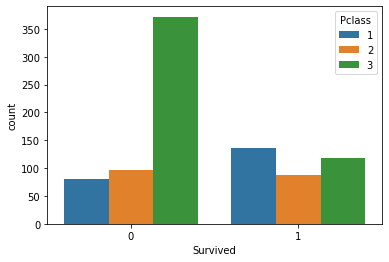

In [11]:
ax = sns.countplot(x='Survived', hue='Pclass', data = train_data)
labels = ax.get_xticklabels() # get x labels

heights = [(x.get_x(), x.get_height()) for x in ax.patches]
response = dict()
for x, y in zip(list(heights)[::len(labels)], list(heights)[1::len(labels)]):
    response[x[0]] = x[1] + y[1]
    response[y[0]] = response[x[0]]

In [12]:
a = [468, 109, 81, 233]
tup = [(ind, sum(x)) for ind, x in enumerate(zip(a[::2], a[1::2]))]
print(tup)
inx = 0
cats = int(len(a)/2)

for i in a:
    print([y for x,y in tup if x == inx])
    inx +=1

[(0, 577), (1, 314)]
[577]
[314]
[]
[]


# Important lesson learnt!
## Male 577 : 468 + 109
### Contrary to my intution that the patches are sorted as seen in chart, they are NOT. Infact the patches are sorted as category wise 
### i.e. if there are two categories (or classes in this case M and F) then patches list is [patch_1_cat_1, patch_2_cat_1, patch_3_cat_2, patch_4_cat_2]
### but we see them as [patch_1_cat_1, patch_2_cat_2, patch_3_cat_1, patch_4_cat_2]

## Total Fatality Rate

heights s1 [(-0.4, 549)]
heights s2 [(0.6, 342)]
(-0.4, 549) - (0.6, 342)
{-0.4: 891, 0.6: 891}


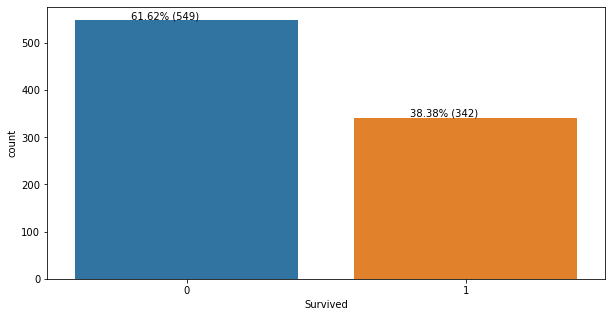

In [13]:
countplot('Survived', None, train_data, (10,5))

## Class wise survival

heights s1 [(-0.4, 80), (-0.13333333333333333, 97), (0.13333333333333336, 372)]
heights s2 [(0.6, 136), (0.8666666666666667, 87), (1.1333333333333333, 119)]
(-0.4, 80) - (0.6, 136)
(-0.13333333333333333, 97) - (0.8666666666666667, 87)
(0.13333333333333336, 372) - (1.1333333333333333, 119)
{-0.4: 216, 0.6: 216, -0.13333333333333333: 184, 0.8666666666666667: 184, 0.13333333333333336: 491, 1.1333333333333333: 491}


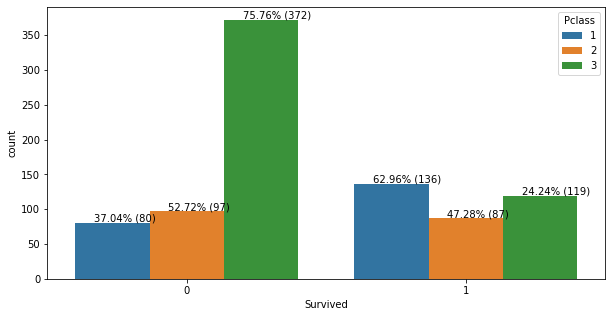

In [14]:
countplot('Survived', 'Pclass', train_data, (10,5))

### Gender wise survival

heights s1 [(-0.4, 468), (-2.7755575615628914e-17, 81)]
heights s2 [(0.6000000000000001, 109), (0.9999999999999999, 233)]
(-0.4, 468) - (0.6000000000000001, 109)
(-2.7755575615628914e-17, 81) - (0.9999999999999999, 233)
{-0.4: 577, 0.6000000000000001: 577, -2.7755575615628914e-17: 314, 0.9999999999999999: 314}


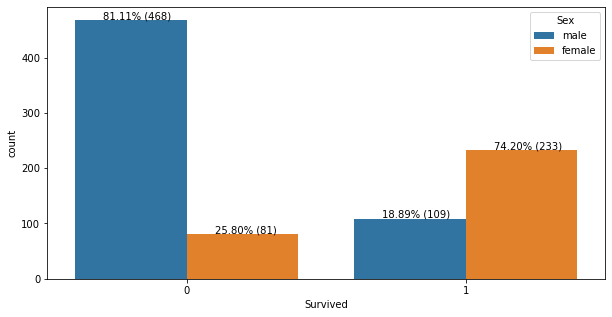

In [15]:
countplot('Survived', 'Sex', train_data, (10,5))

In [16]:
### C3 died the most
### C2 ~ half died 
### C1 died least
### Males died more than females.

heights s1 [(-0.4, 398.0), (-0.28571428571428575, 97.0), (-0.17142857142857143, 15.0), (-0.05714285714285715, 12.0), (0.05714285714285712, 15.0), (0.17142857142857137, 5.0), (0.2857142857142857, 7.0)]
heights s2 [(0.6, 210.0), (0.7142857142857142, 112.0), (0.8285714285714285, 13.0), (0.9428571428571428, 4.0), (1.0571428571428572, 3.0), (1.1714285714285715, nan), (1.2857142857142858, nan)]
(-0.4, 398.0) - (0.6, 210.0)
(-0.28571428571428575, 97.0) - (0.7142857142857142, 112.0)
(-0.17142857142857143, 15.0) - (0.8285714285714285, 13.0)
(-0.05714285714285715, 12.0) - (0.9428571428571428, 4.0)
(0.05714285714285712, 15.0) - (1.0571428571428572, 3.0)
(0.17142857142857137, 5.0) - (1.1714285714285715, nan)
(0.2857142857142857, 7.0) - (1.2857142857142858, nan)
{-0.4: 608.0, 0.6: 608.0, -0.28571428571428575: 209.0, 0.7142857142857142: 209.0, -0.17142857142857143: 28.0, 0.8285714285714285: 28.0, -0.05714285714285715: 16.0, 0.9428571428571428: 16.0, 0.05714285714285712: 18.0, 1.0571428571428572: 18.

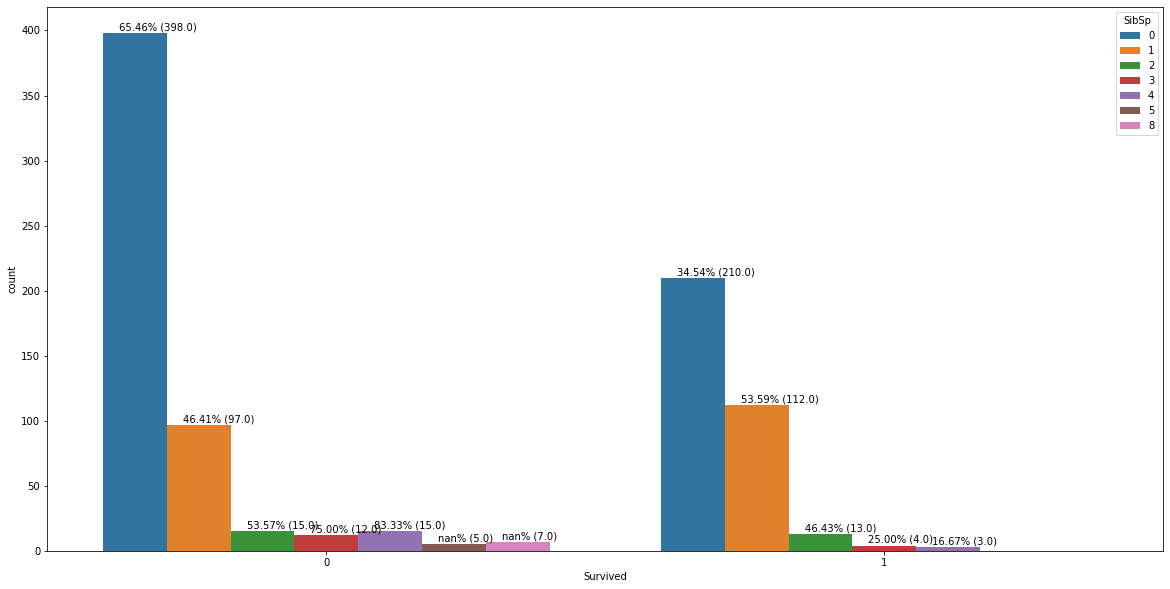

In [17]:
countplot('Survived', 'SibSp', train_data, (20,10))

heights s1 [(-0.4, 445.0), (-0.28571428571428575, 53.0), (-0.17142857142857143, 40.0), (-0.05714285714285715, 2.0), (0.05714285714285712, 4.0), (0.17142857142857137, 4.0), (0.2857142857142857, 1.0)]
heights s2 [(0.6, 233.0), (0.7142857142857142, 65.0), (0.8285714285714285, 40.0), (0.9428571428571428, 3.0), (1.0571428571428572, nan), (1.1714285714285715, 1.0), (1.2857142857142858, nan)]
(-0.4, 445.0) - (0.6, 233.0)
(-0.28571428571428575, 53.0) - (0.7142857142857142, 65.0)
(-0.17142857142857143, 40.0) - (0.8285714285714285, 40.0)
(-0.05714285714285715, 2.0) - (0.9428571428571428, 3.0)
(0.05714285714285712, 4.0) - (1.0571428571428572, nan)
(0.17142857142857137, 4.0) - (1.1714285714285715, 1.0)
(0.2857142857142857, 1.0) - (1.2857142857142858, nan)
{-0.4: 678.0, 0.6: 678.0, -0.28571428571428575: 118.0, 0.7142857142857142: 118.0, -0.17142857142857143: 80.0, 0.8285714285714285: 80.0, -0.05714285714285715: 5.0, 0.9428571428571428: 5.0, 0.05714285714285712: nan, 1.0571428571428572: nan, 0.17142

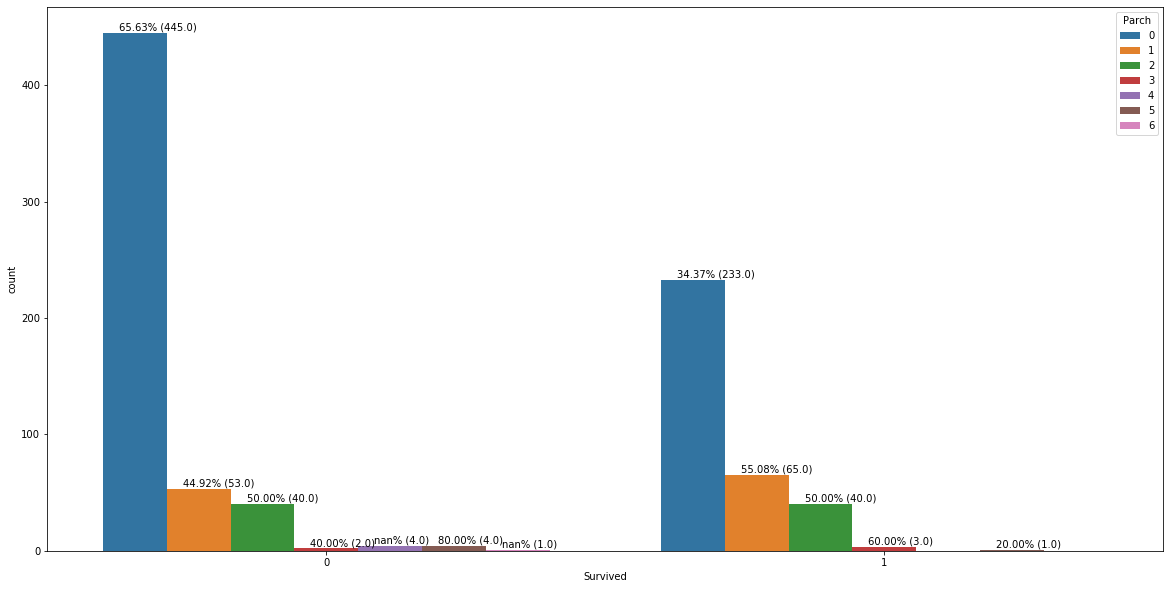

In [18]:
countplot('Survived', 'Parch', train_data, (20,10))

In [72]:
def get_predictions_RFC(train_data, y, test_data):
    X = pd.get_dummies(train_data).drop(columns=['PassengerId'])
    X_test = pd.get_dummies(test_data).drop(columns=['PassengerId'])
    model = RandomForestClassifier(
            n_estimators=100,
            max_depth=5,
            random_state=1)
    model.fit(X, y)
    predictions = model.predict(X_test)
    output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
    return output

In [79]:
features_1 = ['PassengerId','Pclass', 'Sex', 'SibSp', 'Parch']
base_1 = get_predictions_RFC(train_data[features_1], train_data['Survived'], test_data[features_1])
base_1.to_csv('base_1.csv', index=False)

891
418


In [80]:
base_1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [83]:
features_2 = ['PassengerId','Pclass', 'Sex', 'SibSp', 'Parch', 'Age']
base_2 = get_predictions_RFC(train_data[features_2], train_data['Survived'], test_data[features_2])
base_2.to_csv('base_2.csv', index=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [84]:
features_3 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
base_3 = get_predictions_RFC(features_3, train_data, test_data)

KeyError: "['PassengerId'] not found in axis"

In [ ]:
features_4 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Age', 'Embarked']
base_4 = get_predictions_RFC(features_4, train_data, test_data)

#### Experimentation Starts

In [51]:
predicted_test = pd.merge(test_data, output, on='PassengerId')

In [53]:
predicted_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


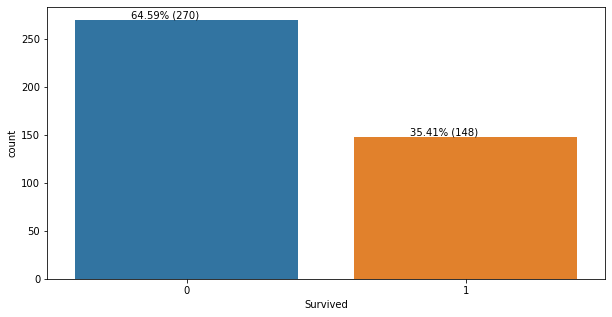

In [62]:
countplot('Survived', None, predicted_test, (10,5))

##### Above shows, just more than half did NOT survived.
###### Lets see what is proportion based on gender

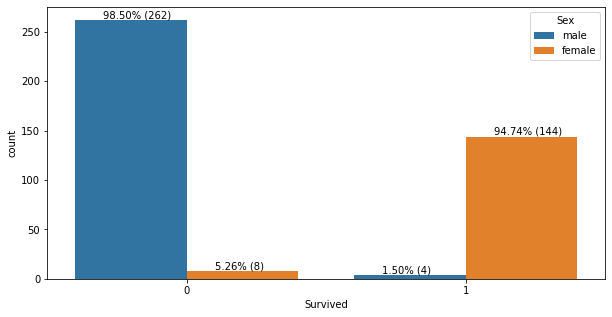

In [60]:
countplot('Survived', 'Sex', predicted_test, (10,5))

###### Above tells me that mostly females survived...   seems NOT OKAY - I havent ran this outcome through Kaggle at this point (for anyone thinking....)

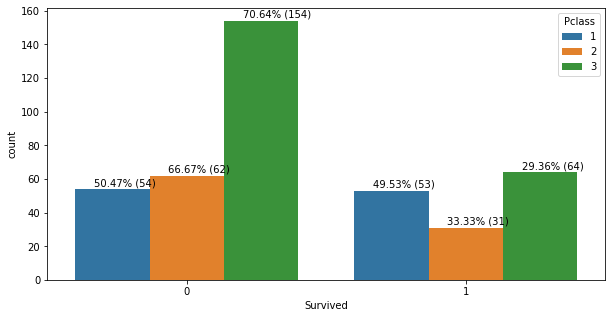

In [63]:
countplot('Survived', 'Pclass', predicted_test, (10,5))

##### Un-interestingly above indicates that the 3rd class have highest fatality rate and so do our train data...... seems alright

#### Age wise survival

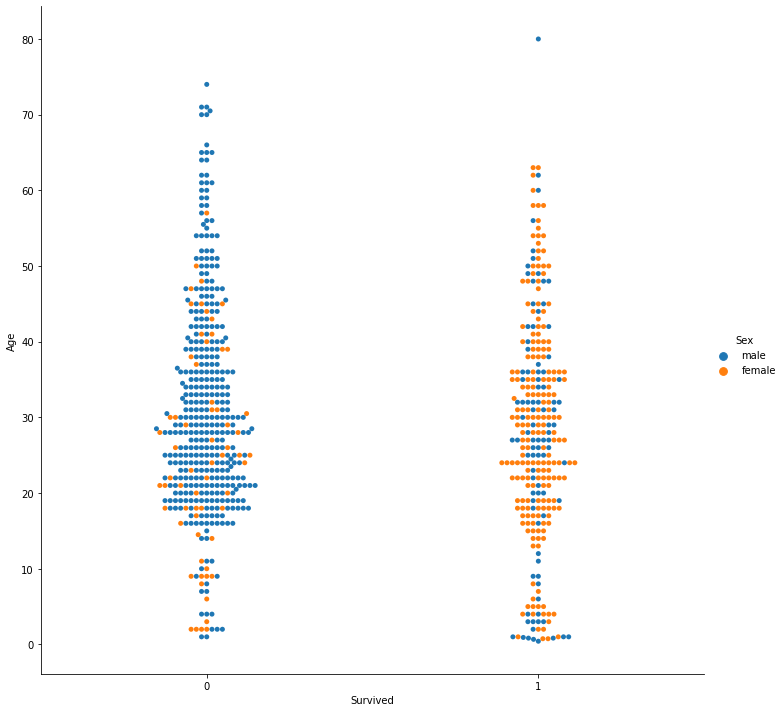

In [159]:
# grouped_by_age = train_data.groupby('Age')
def cat_plot(x_col_name, y_col_name, hue_, kind_):
    cat = sns.catplot(x=x_col_name, y=y_col_name, hue=hue_, data=train_data, kind=kind_, height=10)
cat_plot('Survived', 'Age', 'Sex','swarm')

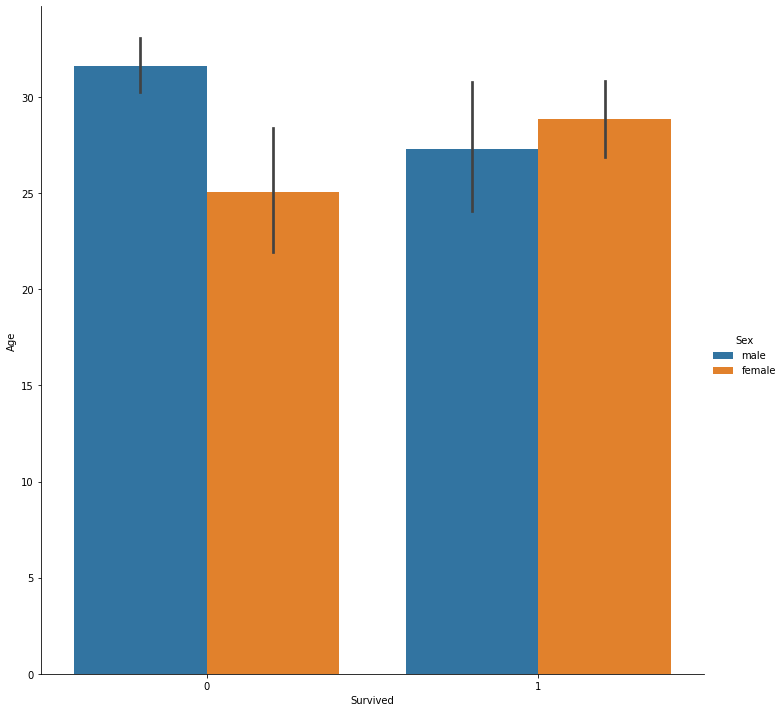

In [164]:
cat_plot('Survived', 'Age', 'Sex', 'bar')

### So I found out that there is lot of people with missing 'Age' value ........ interesting... lets try to find out age first! - Its basically finding the missing values.

In [447]:
null_age = train_data[train_data['Age'].isnull()]
# ['Survived','SibSp', 'Parch', 'Pclass', 'Name']

In [448]:
print("Null age records: {}".format(len(null_age)))

Null age records: 177


####  A way at the moment can be dividing into two classes, adult and child..... since there is fare column , we might get help from there... to find missing age values but more intelligently
#### Hypothesis is that fare of a child is probably going to be less than an adult.... lets see
<p> Additionally, looking at the other cols such as Parch (# of Parent/children) and SibSp (# of Sibling, Spouse): we can also say that a person with SibSp > 1 is probably going to be a child since one person will/can/should "ideally" have one spouse and the value would probably indicate # of Siblings i.e. that record is more likely of a child, not of an adult! <br/> Conversely, if SibSp is 1 than more likely that indicates Spouse and the record be of an adult but this cannot be said with greater confidence as a person who is a child can have one sibling too - further that means there should be another record of her/his sibling..... so i guess we can confirm in that case too.. let see....
</p>
<p>
    While I am here writing this, it clicked me that we can last names can be used to link people and so their siblings/ spouse futher putting them in age brackets of either adult or child.
</p>

In [200]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# OMGGGADDHHH... it made my headache to why I was getting a third column with all None.....     to find out why follow down

In [4]:
def split_on_last_name(train_data_sub):
    last_name_split_sal = train_data_sub['Name'].str.split('[,.]', expand=True)
    return  train_data_sub.join(last_name_split_sal)

In [5]:
train_data_split = split_on_last_name(train_data)
train_data_split.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),None
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,None


## This is WHY i was getting 3rd columns which seemed to have all None but there was one record who's name had '.' and the regex splited it as well

In [102]:
train_data_split[train_data_split[3].notnull()]

,Age,Fare,Sex,Parch,SibSp,Name,0,1,2,3
513,54.0,59.4,female,0,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",Rothschild,Mrs,Martin (Elizabeth L,Barrett)


In [24]:
def split_on_last_name(train_data_sub):
    last_name_split_sal = train_data_sub['Name'].str.split('[,.]', expand=True)
    last_name_split_sal[3] = last_name_split_sal[3].apply(lambda s :  '' if s is None else str(s))
    last_name_split_sal['First/Middle Name'] = [ "{} {}".format(x, y) for x,y in zip(last_name_split_sal[2], last_name_split_sal[3])]
    last_name_split_sal = last_name_split_sal.drop(columns=[2,3])
    last_name_split_sal.columns = ['Last Name', 'Salutation', 'First/Middle Name']
    last_name_split_sal = last_name_split_sal.applymap(lambda x: x.strip())
    return  train_data_sub.join(last_name_split_sal)

train_data = split_on_last_name(train_data)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,Salutation,First/Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr,James
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr,Timothy J
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master,Gosta Leonard
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs,Oscar W (Elisabeth Vilhelmina Berg)
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs,Nicholas (Adele Achem)


In [425]:
# train_data_split.set_index(['Last Name', 'Sex'], inplace=True)
# train_data_split.sort_index(inplace=True)
# train_data_split[train_data_split['Age'].isnull()]

#### Lets find out relation between Age and Fare to accurately add missing age values..

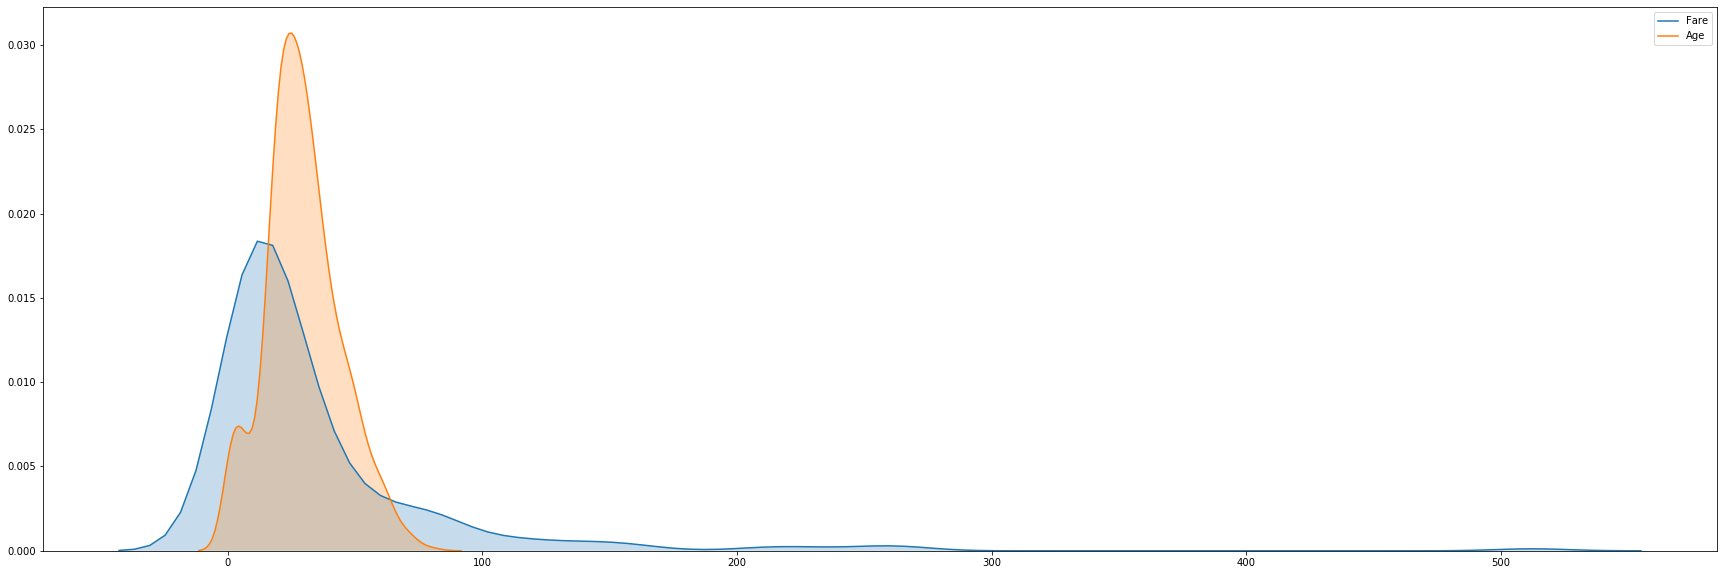

In [14]:
plt.subplots(figsize=(30,10))
sns.kdeplot(train_data[train_data['Age'].isnull() == False]['Fare'], shade= True)
sns.kdeplot(train_data[train_data['Age'].isnull() == False]['Age'], shade= True)

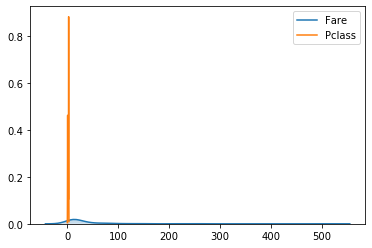

In [161]:
sns.kdeplot(train_data[train_data['Age'].isnull() == False]['Fare'], shade= True)
sns.kdeplot(train_data[train_data['Age'].isnull() == False]['Pclass'], shade= True)

##### For Class P1

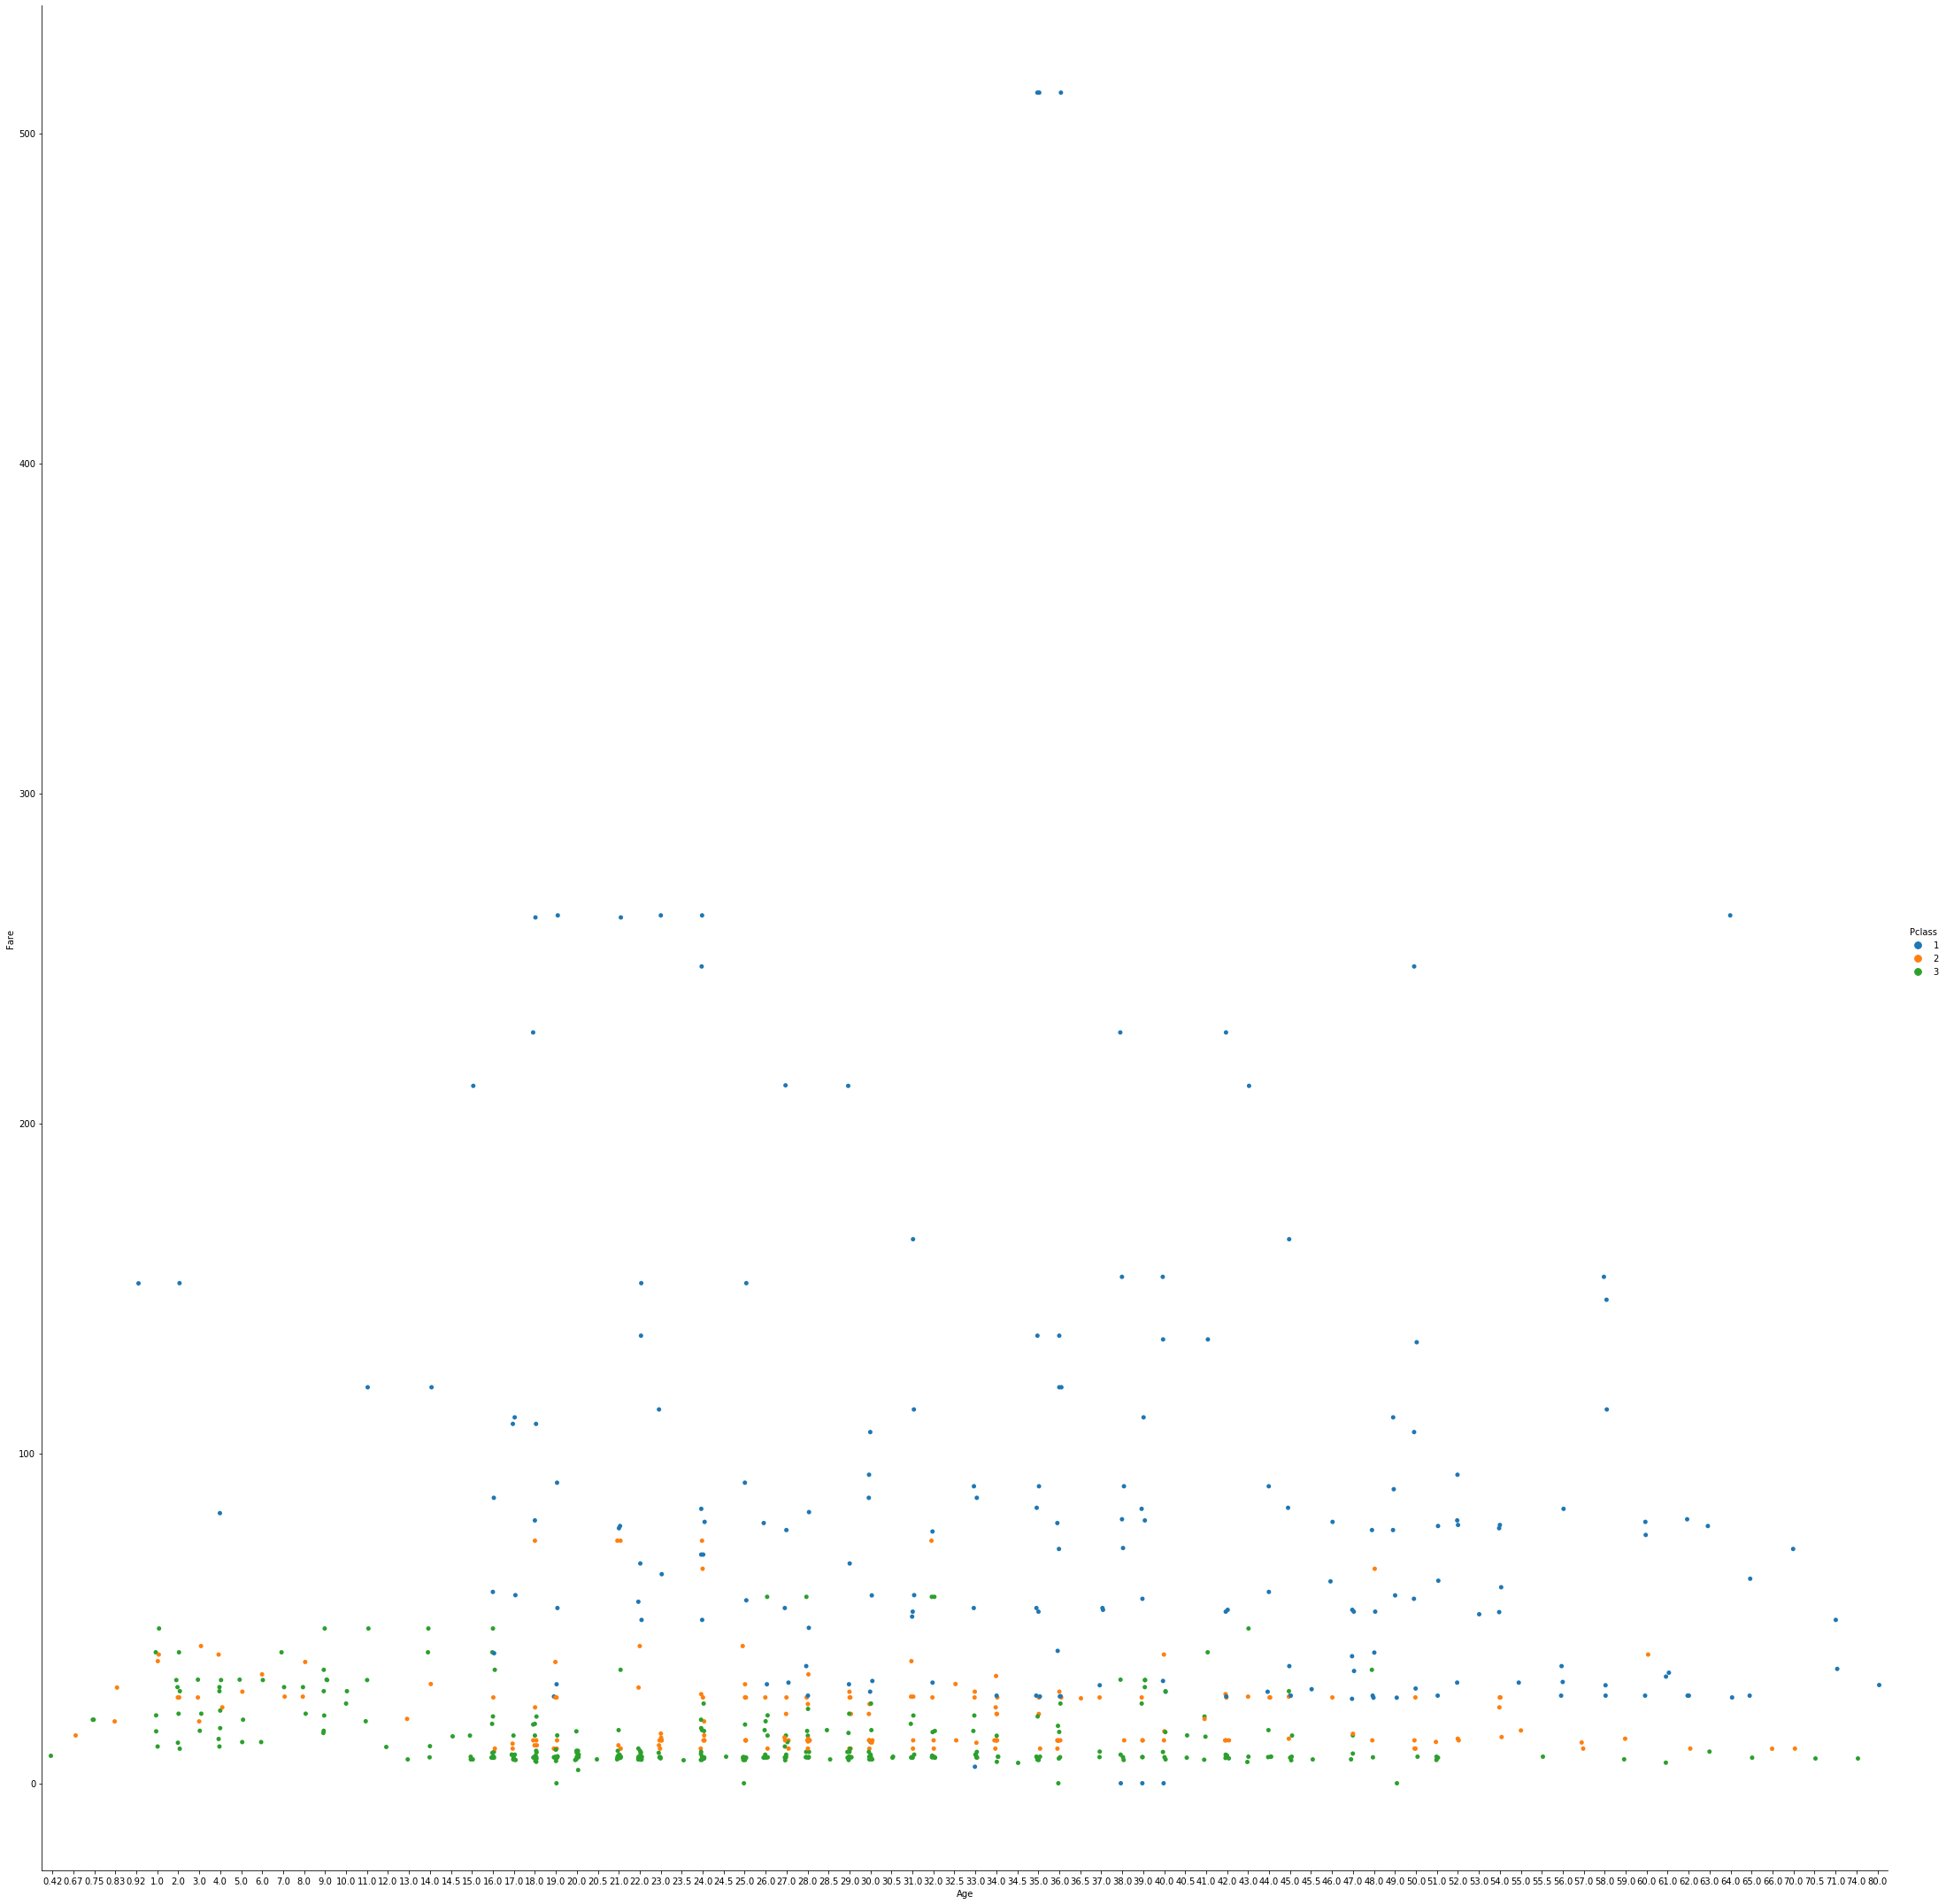

In [184]:
sns.catplot(x="Age", y="Fare", hue='Pclass' ,data=train_data, height=30);

In [ ]:
sns.distplot(x, kde=False, rug=True)

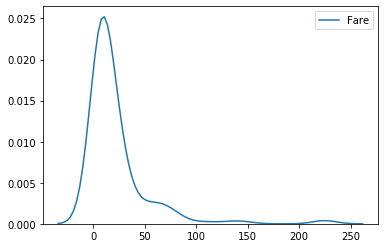

In [118]:
sns.kdeplot(train_data[train_data['Age'].isnull()]['Fare'])

In [15]:
countplot('Fare', None, train_data_split_last_name[101:200], (50,10), False)

NameError: name 'countplot' is not defined

<h1>Replace Missing values: Age by predicted Age using Regression (Random Tree Regressor)</h1>

In [391]:

def get_predictions(X_train, y_train, X_test, depth, error_criteria = 'mae'):
    pids = X_test.PassengerId
    X_train =  X_train.drop(columns=['PassengerId'])
    X_test = X_test.drop(columns=['PassengerId'])
    
    model = DecisionTreeRegressor(random_state=0, criterion = error_criteria, max_depth=depth)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    output = pd.DataFrame({'PassengerId': pids, 
                           'Predicted Age': predictions})
    return output

def predict_age(df, depth, error_criteria = 'mae'):
    df = pd.get_dummies(df)
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Age']), df['Age'], test_size=0.5)

    X_train =  X_train.drop(columns=['PassengerId'])
    
    pids_test = X_test.PassengerId
    X_test = X_test.drop(columns=['PassengerId'])
    
    model = DecisionTreeRegressor(random_state=0, criterion = error_criteria, max_depth=depth)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    output = pd.DataFrame({'PassengerId': pids_test, 
                           'Predicted Age': predictions})
    score = model.score(X_test, y_test)*100
    return (output , score)

In [372]:
def plot_scores_regressor(depths, data, features, error_criteria):
    depth_scores = list()
    for i in depths:
        age_features = features #'Fare', 'Pclass',
        df_age_rel = data[age_features]
        df_age_rel = df_age_rel[df_age_rel['Age'].isnull() == False]
        p_df, score = predict_age(df_age_rel, i, error_criteria)
        depth_scores.append(score)
#         print('Depth: {depth},  Model Score: {score}'.format(depth=i, score = score))

    df_scores =  pd.DataFrame({'Depth': depths,'Score': depth_scores})
    #     pd.merge(p_df, train_data[['PassengerId', 'Age']], on ='PassengerId', how = 'inner')
    plt.subplots(figsize=(30,5))
    sns.lineplot(x=depths, y=depth_scores)
    print('Top Score {score} at depth {depth}'.format(score=df_scores['Score'].max(), depth = df_scores.loc[df_scores['Score'].idxmax()]['Depth']))


Top Score 33.64982815835633 at depth 12.0


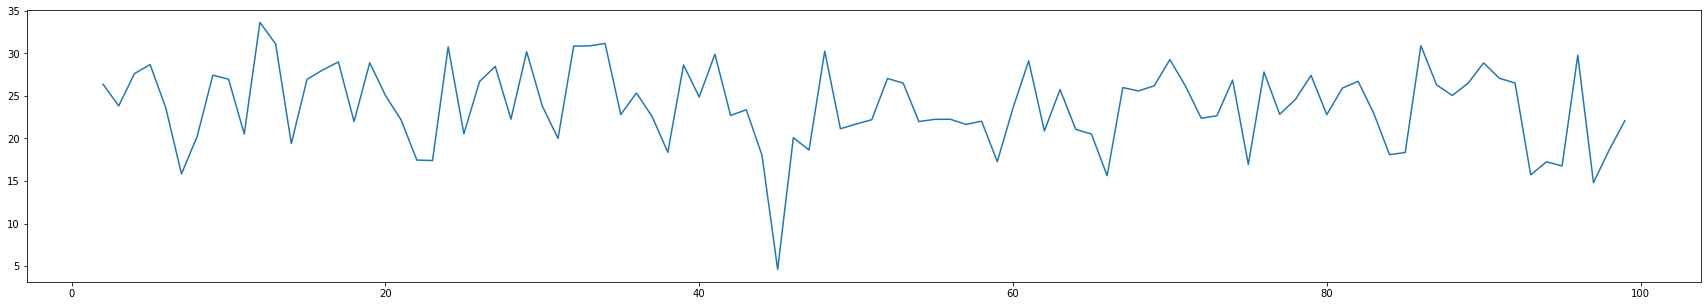

In [373]:
plot_scores_regressor(range(2, 100, 1), train_data_split, ['Age', 'PassengerId', 'Sex', 'SibSp', 'Parch', 'Salutation'], 'mae')

In [508]:
def fill_missing_age(data, features):
    data = data[features]
    data = pd.get_dummies(data)
    X_test = data[data['Age'].isnull()].drop(columns=['Age'])
    
    depth = 12
    X_train = data[data['Age'].isnull() == False].drop(columns=['Age'])
    y_train  = data[data['Age'].isnull() == False][['Age']]
    ages = get_predictions(X_train, y_train, X_test, depth)
    
    data.loc[data['PassengerId'].isin(ages['PassengerId']), "Age"] = ages[['Predicted Age']].values
    
    return data
    


<h1>Using RFClassifier to classify</h1>

In [600]:
def get_outputs(data):
    features = ['PassengerId', 'Sex', 'Age', 'SibSp', 'Parch', 'Survived']
    df = fill_missing_age(data, features)
    score = 0.0
    y = df['Survived']
    X = pd.get_dummies(df.drop(columns=['Survived', 'PassengerId']))
    model = RandomForestClassifier(
            n_estimators=150,
            max_depth=20,
            random_state=1)
    model.fit(X, y)
    return model

In [601]:
model = get_outputs(train_data)
model.score(X, y)*100

ValueError: Number of features of the model must match the input. Model n_features is 5 and input n_features is 7 

In [560]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [552]:
test_data[test_data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [533]:
test_data['Fare'] = test_data['Fare'].fillna(np.mean(test_data['Fare']))

In [535]:
test_data[test_data['PassengerId'] ==  1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,35.627188,NaN,S


In [597]:
test_features = ['PassengerId','Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
df = fill_missing_age(test_data, test_features)
predictions = model.predict(df.drop(columns=['PassengerId']))
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived' : predictions})
output.to_csv('submission2.csv', index=False)

ValueError: Number of features of the model must match the input. Model n_features is 7 and input n_features is 6 

<h1>.... GOD dammm IT performed WORSEEEE..</h1>

<h2>Questions to ask myself are : Where does What went wrong?</h2>
<h2>Is is poor replacement of missing values of Age? -- Can be a possibility. --- Can try to just replace all missing values by mean of all ages.</h2>
<h2>Maybe try other classifier?</h2>


# Attempt 3 - replace missing age with age_mean

In [25]:
train_labels = train_data[['Survived']]
train_features = train_data[['PassengerId', 'Last Name', 'Salutation', 'First/Middle Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Pclass', 'Fare', 'Ticket', 'Cabin', 'Embarked' ]]

In [27]:
train_features['Age'] = train_features['Age'].fillna(np.mean(train_data['Age']))

C:\Users\divjo\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
train_features.head(20)

,PassengerId,Last Name,Salutation,First/Middle Name,Sex,Age,SibSp,Parch,Pclass,Fare,Ticket,Cabin,Embarked
0,1,Braund,Mr,Owen Harris,male,22.000000,1,0,3,7.2500,A/5 21171,NaN,S
1,2,Cumings,Mrs,John Bradley (Florence Briggs Thayer),female,38.000000,1,0,1,71.2833,PC 17599,C85,C
2,3,Heikkinen,Miss,Laina,female,26.000000,0,0,3,7.9250,STON/O2. 3101282,NaN,S
3,4,Futrelle,Mrs,Jacques Heath (Lily May Peel),female,35.000000,1,0,1,53.1000,113803,C123,S
4,5,Allen,Mr,William Henry,male,35.000000,0,0,3,8.0500,373450,NaN,S
5,6,Moran,Mr,James,male,29.699118,0,0,3,8.4583,330877,NaN,Q
6,7,McCarthy,Mr,Timothy J,male,54.000000,0,0,1,51.8625,17463,E46,S
7,8,Palsson,Master,Gosta Leonard,male,2.000000,3,1,3,21.0750,349909,NaN,S
8,9,Johnson,Mrs,Oscar W (Elisabeth Vilhelmina Berg),female,27.000000,0,2,3,11.1333,347742,NaN,S
9,10,Nasser,Mrs,Nicholas (Adele Achem),female,14.000000,1,0,2,30.0708,237736,NaN,C


## Lets get outputs after this change

In [33]:
features = ['Sex', 'Age', 'SibSp', 'Parch', 'Pclass' ]
model = RandomForestClassifier(
            n_estimators=150,
            max_depth=20,
            random_state=1)
X = pd.get_dummies(train_features[features])
model.fit(X, train_labels)

NameError: name 'RandomForestClassifier' is not defined